In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

Importing the Dataset

In [3]:
train_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [4]:
print (train_data.shape)
print (test_data.shape)

(175000, 17)
(50000, 16)


In [5]:
train_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

The dataset has two columns corresponding to date values. We will convert them to datetime format and extract the month, date, day and time from these columns and store them in seperate columns.

In [7]:
train_data['tpep_pickup_datetime'] = pd.to_datetime(train_data['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
train_data['tpep_dropoff_datetime'] = pd.to_datetime(train_data['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

train_data['hour_of_pickup'] = train_data['tpep_pickup_datetime'].dt.hour
train_data['hour_of_drop'] = train_data['tpep_dropoff_datetime'].dt.hour
train_data['day_of_week_pickup'] = train_data['tpep_pickup_datetime'].dt.weekday
train_data['day_of_week_drop'] = train_data['tpep_dropoff_datetime'].dt.weekday
train_data['day_of_month_pickup'] = train_data['tpep_pickup_datetime'].dt.day
train_data['day_of_month_drop'] = train_data['tpep_dropoff_datetime'].dt.day
train_data['month_of_pickup'] = train_data['tpep_pickup_datetime'].dt.month
train_data['month_of_drop'] = train_data['tpep_dropoff_datetime'].dt.month

train_data = train_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)

The feature 'store_and_fwd_flag' is flag indicating whether the trip data was stored and forwarded. This feature inutively seems should not contribute much in affecting our target variable, i.e, total_amount. So dropping it.

In [8]:
train_data = train_data.drop(['store_and_fwd_flag'], axis=1)

In [9]:
train_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,hour_of_pickup,hour_of_drop,day_of_week_pickup,day_of_week_drop,day_of_month_pickup,day_of_month_drop,month_of_pickup,month_of_drop
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,...,168923.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,...,2.246971,0.158825,15.117183,15.103109,3.188657,3.201669,29.061114,28.969726,6.004251,6.007731
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,...,0.819216,0.511968,5.772325,5.951523,0.745635,0.749595,1.975845,2.575305,0.065064,0.087588
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,-2.500000,-1.750000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,...,2.500000,0.000000,11.000000,11.000000,3.000000,3.000000,29.000000,29.000000,6.000000,6.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,...,2.500000,0.000000,16.000000,17.000000,3.000000,3.000000,29.000000,29.000000,6.000000,6.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,...,2.500000,0.000000,20.000000,20.000000,4.000000,4.000000,30.000000,30.000000,6.000000,6.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,23.000000,23.000000,5.000000,5.000000,30.000000,30.000000,7.000000,7.000000


Plotting a histogram plot of the features.

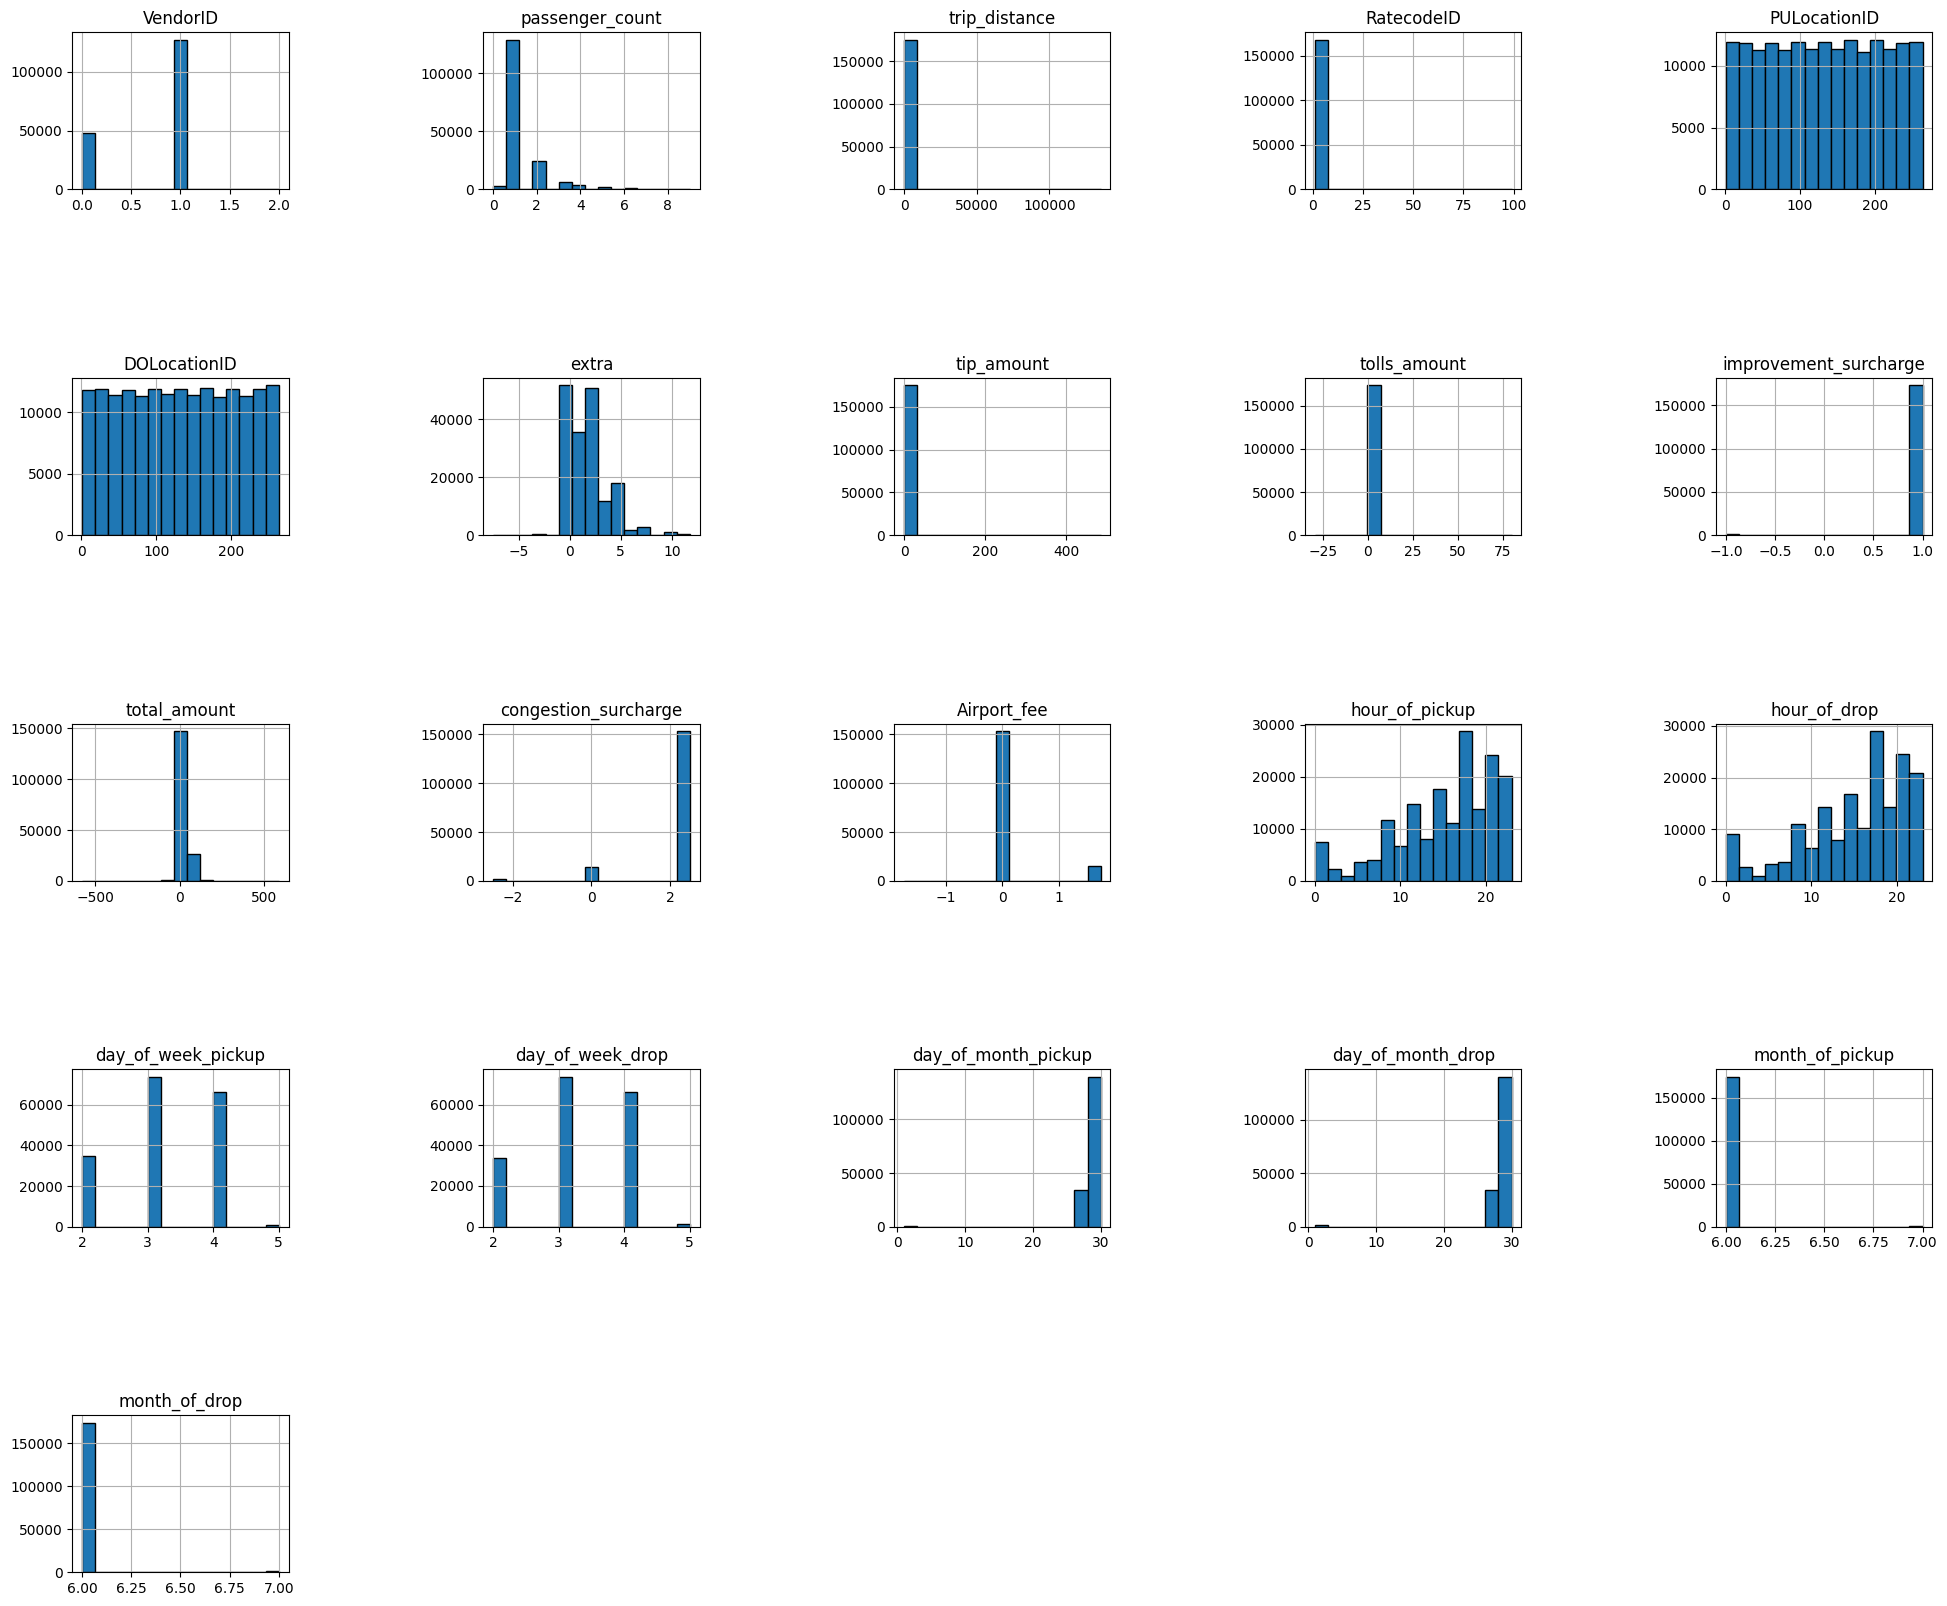

In [10]:
numcols = train_data.select_dtypes(include = 'number').columns.to_list()
train_data[numcols].hist(figsize=(24,20), bins=15, edgecolor="black")
plt.subplots_adjust(hspace=1.2, wspace=0.9)

Plotting a boxplot to identfiy abnormal outliers.

/tmp/ipykernel_20/1283406677.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


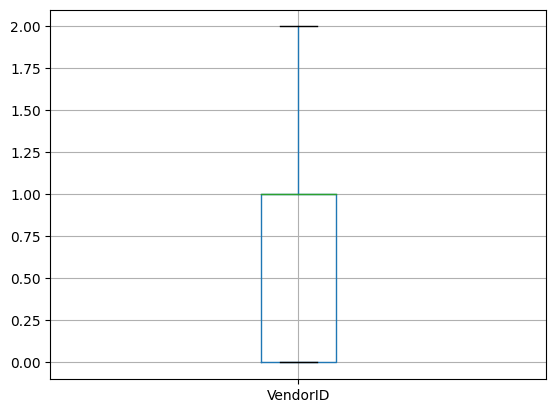

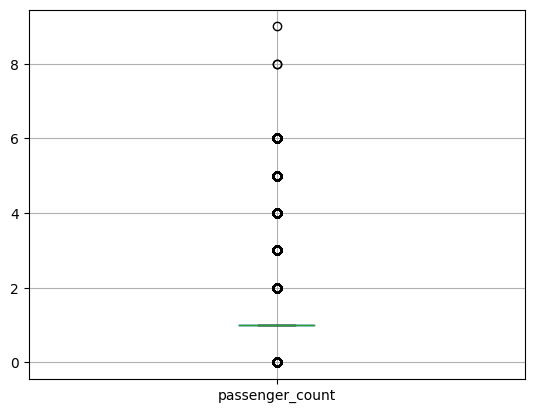

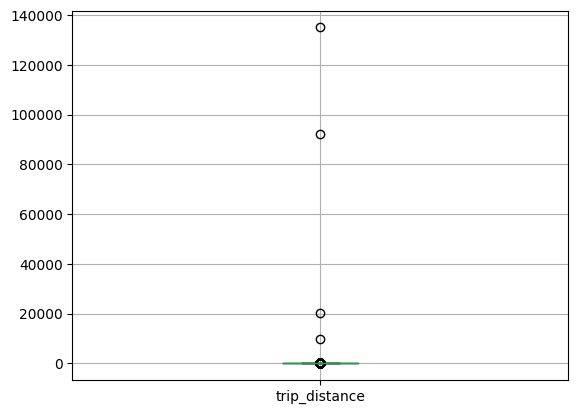

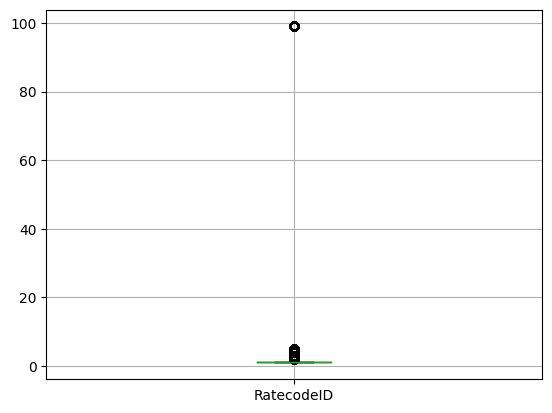

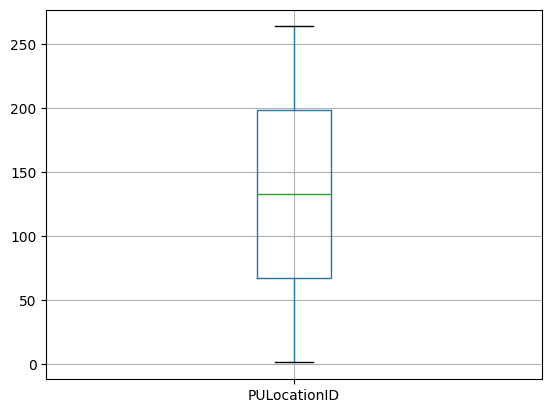

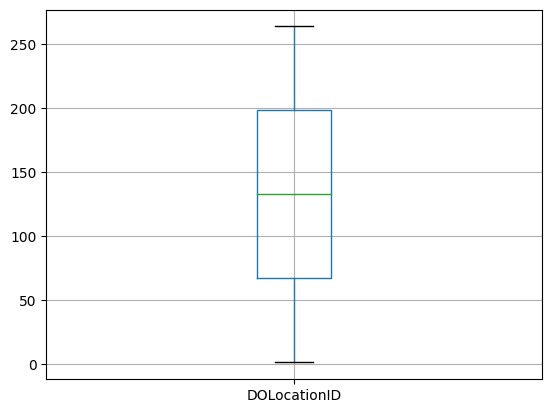

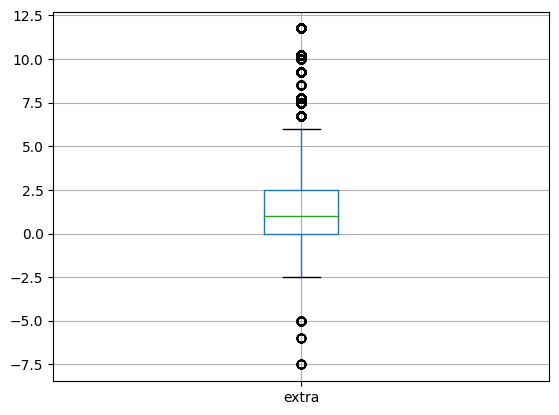

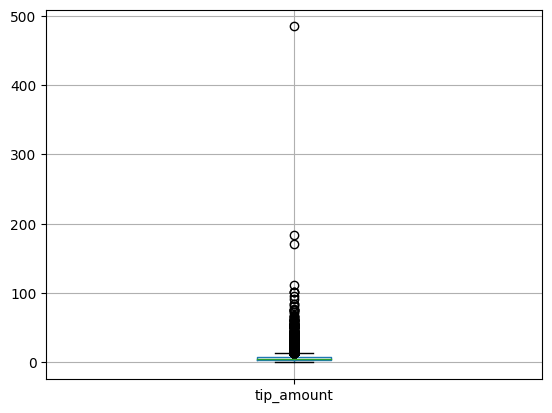

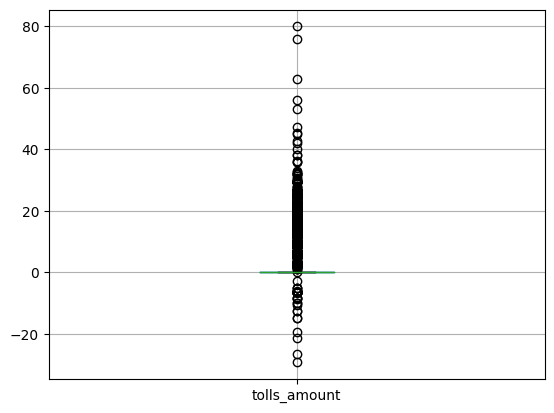

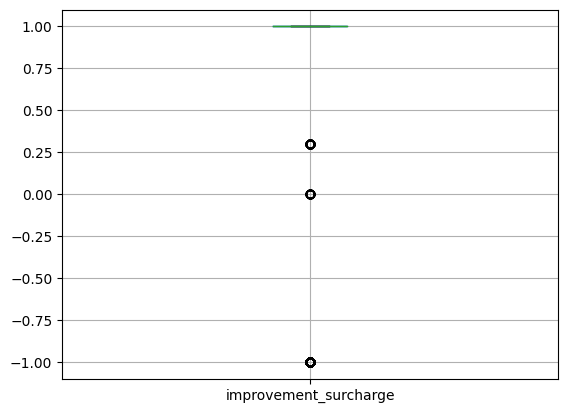

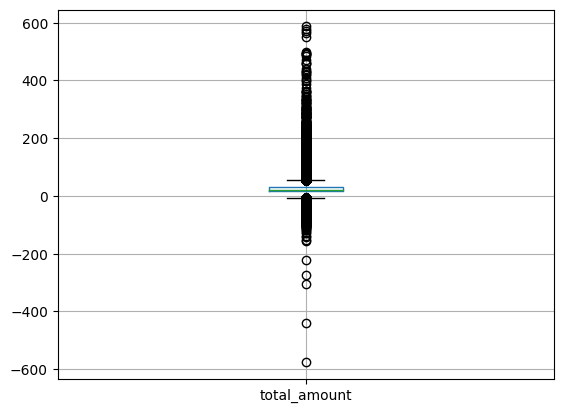

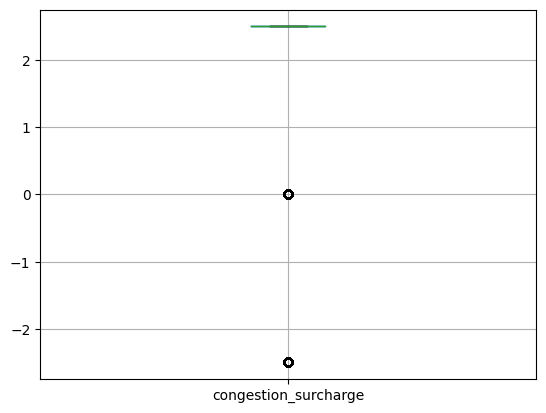

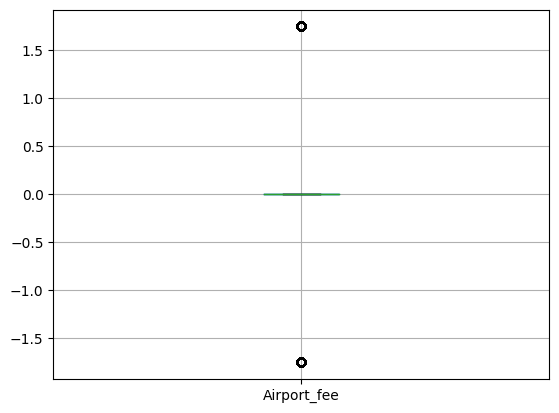

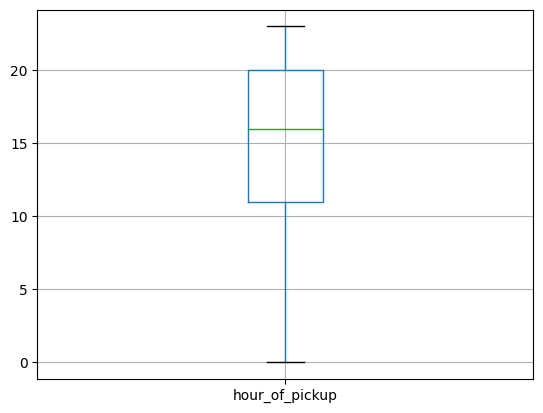

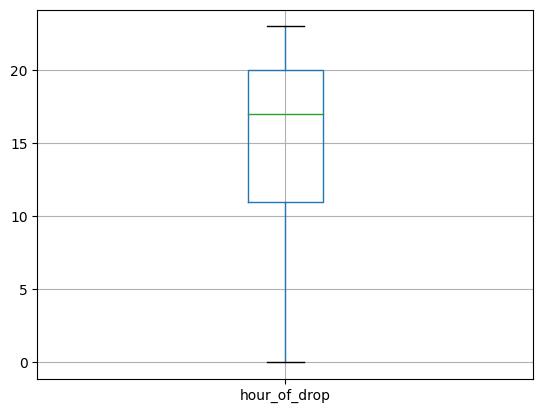

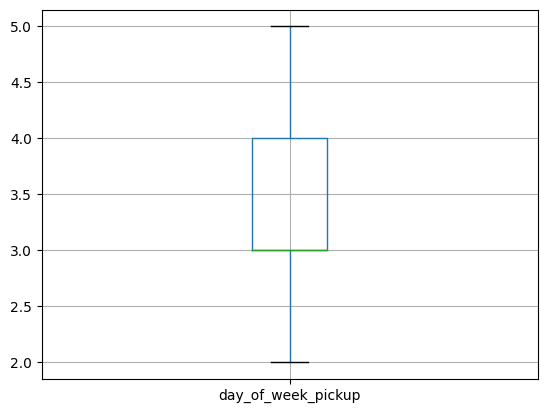

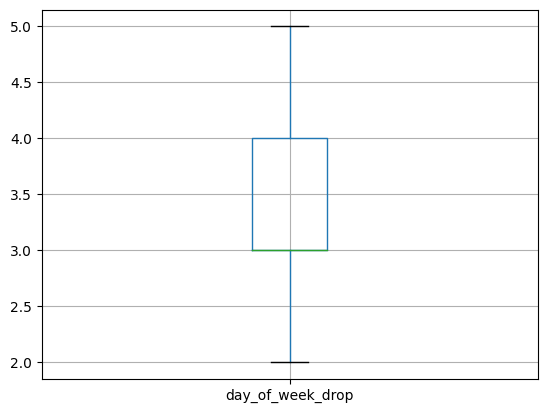

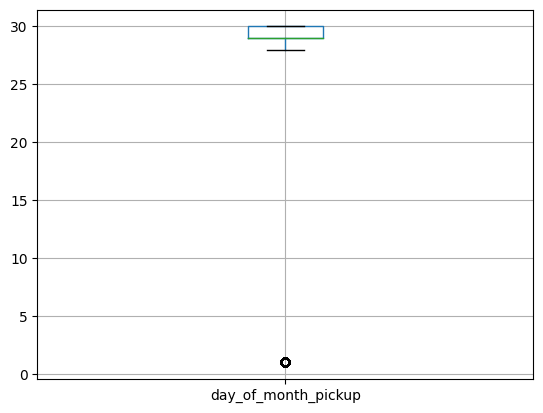

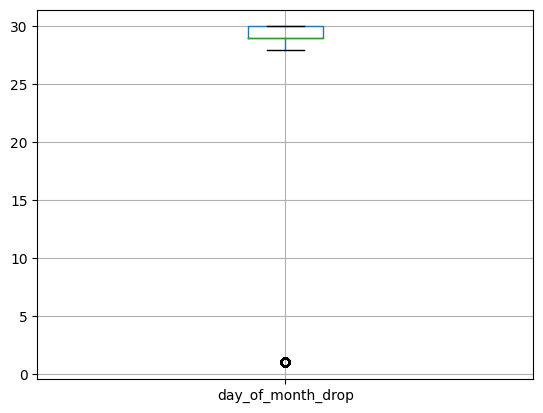

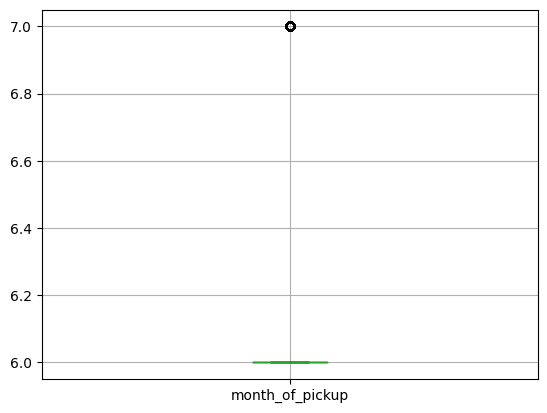

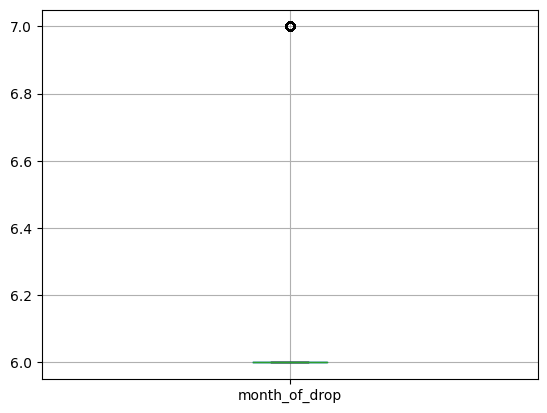

In [11]:
for column in train_data[numcols].columns:
      plt.figure()
      train_data.boxplot([column])

In [12]:
print ("No. of rows with trip distance greater than 500",train_data.loc[(train_data['trip_distance'] >= 500)].shape[0])
print ("No. of rows with tip amount greater than 200",train_data.loc[(train_data['tip_amount'] >= 200)].shape[0])

print ("No. of rows with negative tolls amount",train_data.loc[(train_data['tolls_amount'] < 0)].shape[0])
print ("No. of rows with negative improvement surcharge",train_data.loc[(train_data['improvement_surcharge'] < 0)].shape[0])
print ("No. of rows with negative congestion surcharge",train_data.loc[(train_data['congestion_surcharge'] < 0)].shape[0])
print ("No. of rows with negative Airport fee",train_data.loc[(train_data['Airport_fee'] < 0)].shape[0])

No. of rows with trip distance greater than 500 4
No. of rows with tip amount greater than 200 1
No. of rows with negative tolls amount 126
No. of rows with negative improvement surcharge 1725
No. of rows with negative congestion surcharge 1386
No. of rows with negative Airport fee 259


There are only 4 and 1 rows with trip distance greater than 500 and tip amount greater than 200 respectively, they can be outliers hence we'll remove them.

In [13]:
train_data = train_data[train_data['trip_distance'] < 500]
train_data=train_data[train_data['tip_amount'] < 200]
train_data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,...,congestion_surcharge,Airport_fee,hour_of_pickup,hour_of_drop,day_of_week_pickup,day_of_week_drop,day_of_month_pickup,day_of_month_drop,month_of_pickup,month_of_drop
0,1,1.0,2.14,1.0,120,9,Credit Card,2.5,7.165589,0.0,...,2.5,0.00,17,16,2,2,28,28,6,6
1,0,1.0,2.70,1.0,15,215,Credit Card,3.5,6.067401,0.0,...,2.5,0.00,23,22,3,3,29,29,6,6
2,1,1.0,1.15,1.0,167,223,Credit Card,0.0,4.111547,0.0,...,2.5,0.00,10,11,4,4,30,30,6,6
3,0,1.0,0.40,1.0,128,239,Credit Card,2.5,6.411079,0.0,...,2.5,0.00,13,14,3,3,29,29,6,6
4,1,3.0,1.10,1.0,203,52,Credit Card,1.0,4.769377,0.0,...,2.5,0.00,22,22,3,3,29,29,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,147,167,Credit Card,1.0,8.732495,0.0,...,2.5,0.00,22,22,4,4,30,30,6,6
174996,1,1.0,9.44,1.0,154,191,Cash,5.0,0.283275,0.0,...,2.5,1.75,13,14,4,4,30,30,6,6
174997,0,1.0,2.40,1.0,168,106,Credit Card,2.5,4.245354,0.0,...,2.5,0.00,11,12,3,3,29,29,6,6
174998,1,1.0,4.71,1.0,240,100,Credit Card,2.5,10.479776,0.0,...,2.5,0.00,19,19,3,3,29,29,6,6


In [14]:
X_data = train_data.drop(['total_amount'], axis=1)
y = train_data['total_amount']

In [15]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174995 entries, 0 to 174999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               174995 non-null  int64  
 1   passenger_count        168921 non-null  float64
 2   trip_distance          174995 non-null  float64
 3   RatecodeID             168921 non-null  float64
 4   PULocationID           174995 non-null  int64  
 5   DOLocationID           174995 non-null  int64  
 6   payment_type           174995 non-null  object 
 7   extra                  174995 non-null  float64
 8   tip_amount             174995 non-null  float64
 9   tolls_amount           174995 non-null  float64
 10  improvement_surcharge  174995 non-null  float64
 11  congestion_surcharge   168921 non-null  float64
 12  Airport_fee            168921 non-null  float64
 13  hour_of_pickup         174995 non-null  int32  
 14  hour_of_drop           174995 non-null  i

In [16]:
X_data.isna().sum()

VendorID                    0
passenger_count          6074
trip_distance               0
RatecodeID               6074
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     6074
Airport_fee              6074
hour_of_pickup              0
hour_of_drop                0
day_of_week_pickup          0
day_of_week_drop            0
day_of_month_pickup         0
day_of_month_drop           0
month_of_pickup             0
month_of_drop               0
dtype: int64

In [17]:
cat_cols = ['payment_type']
num_cols = [col for col in X_data.columns if col not in cat_cols]

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='passthrough',
    n_jobs=-1)

X_data = col_trans.fit_transform(X_data)

X_data= pd.DataFrame(
    X_data,
    columns=col_trans.get_feature_names_out()
)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174995 entries, 0 to 174994
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   num_pipeline__VendorID                  174995 non-null  float64
 1   num_pipeline__passenger_count           174995 non-null  float64
 2   num_pipeline__trip_distance             174995 non-null  float64
 3   num_pipeline__RatecodeID                174995 non-null  float64
 4   num_pipeline__PULocationID              174995 non-null  float64
 5   num_pipeline__DOLocationID              174995 non-null  float64
 6   num_pipeline__extra                     174995 non-null  float64
 7   num_pipeline__tip_amount                174995 non-null  float64
 8   num_pipeline__tolls_amount              174995 non-null  float64
 9   num_pipeline__improvement_surcharge     174995 non-null  float64
 10  num_pipeline__congestion_surcharge      1749

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.20, random_state=42)

**MODELS**

Linear Regression

In [20]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
reg_model.score(X_test, y_test)

0.8786295508335075

Linear Regression with Polynomial Features

In [21]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)
X_test_poly = poly.transform(X_test)
poly_reg_model.score(X_test_poly, y_test)

0.9137798691211556

Risge Regression

In [22]:
ridge_reg = Ridge()

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

best_ridge_reg = Ridge(alpha=best_alpha)
best_ridge_reg.fit(X_train, y_train)

best_ridge_reg.score(X_test, y_test)

0.8786288765897488

KNN Regressor

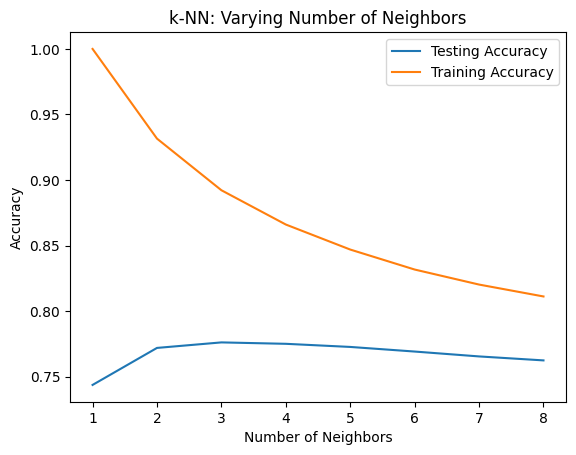

In [23]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsRegressor(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.77606232489613

Random Forest Regressor

In [25]:
# Define the RandomForestRegressor
rf = RandomForestRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_rf_model.score(X_test, y_test)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}


0.9591465123465426

Tha above grid search took almost half an hour so writing the result below

In [26]:
regr = RandomForestRegressor(n_estimators=100,max_depth=15, min_samples_split=5)
regr.fit(X_train, y_train)

regr.score(X_test, y_test)

0.959917194266355

RandomForestRegressor on test data as it was the best model for train data.

In [27]:
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

test_data['hour_of_pickup'] = test_data['tpep_pickup_datetime'].dt.hour
test_data['hour_of_drop'] = test_data['tpep_dropoff_datetime'].dt.hour
test_data['day_of_week_pickup'] = test_data['tpep_pickup_datetime'].dt.weekday
test_data['day_of_week_drop'] = test_data['tpep_dropoff_datetime'].dt.weekday
test_data['day_of_month_pickup'] = test_data['tpep_pickup_datetime'].dt.day
test_data['day_of_month_drop'] = test_data['tpep_dropoff_datetime'].dt.day
test_data['month_of_pickup'] = test_data['tpep_pickup_datetime'].dt.month
test_data['month_of_drop'] = test_data['tpep_dropoff_datetime'].dt.month

test_data = test_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)

In [28]:
test_data = test_data.drop(['store_and_fwd_flag'], axis=1)

test_data = col_trans.transform(test_data)

test_data= pd.DataFrame(
    test_data,
    columns=col_trans.get_feature_names_out()
)

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   num_pipeline__VendorID                  50000 non-null  float64
 1   num_pipeline__passenger_count           50000 non-null  float64
 2   num_pipeline__trip_distance             50000 non-null  float64
 3   num_pipeline__RatecodeID                50000 non-null  float64
 4   num_pipeline__PULocationID              50000 non-null  float64
 5   num_pipeline__DOLocationID              50000 non-null  float64
 6   num_pipeline__extra                     50000 non-null  float64
 7   num_pipeline__tip_amount                50000 non-null  float64
 8   num_pipeline__tolls_amount              50000 non-null  float64
 9   num_pipeline__improvement_surcharge     50000 non-null  float64
 10  num_pipeline__congestion_surcharge      50000 non-null  fl

In [30]:
y_pred = regr.predict(test_data)

In [31]:
y_pred

array([34.05215278, 24.89606896, 16.13610339, ..., 21.16299083,
       35.81802498, 17.65873194])

In [32]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission['ID'] = [i+1 for i in range(len(y_pred))]
submission['total_amount']=y_pred
submission.to_csv('submission.csv',index=False)